## 读取excel（csv）文件

In [1]:
import pandas as pd

In [2]:
data_csv = pd.read_csv('temp/musicdata.csv',header=0)
                                            #`pd.read_csv` 函数通常会自动检测 CSV 文件中的分隔符。
                                            #默认情况下，它假设分隔符是逗号（`,`）。
                                            #`pd.read_csv` 默认不会假设分隔符是一个空格。
                                            #`pd.read_csv` 默认会假设第一行是列名，即 `header=0`。

In [3]:
data_csv

,format,metric,date,number_of_records,value_actual
0,CD,Units,2020/7/31 22:01,1,NaN
1,CD,Units,2020/7/23 6:12,1,NaN
2,CD,Units,2020/7/13 9:30,1,NaN
3,CD,Units,2020/6/30 14:26,1,NaN
4,CD,Units,2020/6/23 20:21,1,NaN
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2013/12/8 3:10,1,6.205390
3004,Vinyl Single,Value (Adjusted),2013/11/21 1:50,1,5.198931
3005,Vinyl Single,Value (Adjusted),2013/10/12 16:06,1,6.339678
3006,Vinyl Single,Value (Adjusted),2013/10/9 17:27,1,5.386197


## 存储数据框

In [4]:
data_csv.to_csv('temp/data_csv.csv',index=True,header=True)#默认保存行索引，若无行索引，生成0-n的索引
                                                           #默认保存列名，默认‘encoding = UTF-8’

In [12]:
data_excel=pd.read_excel('temp/musicdata.xlsx',sheet_name = 'music')#多了sheet_name

In [13]:
data_excel

,是覅,646
0,水电费就,士大夫
1,155,534


In [20]:
data_excel.to_excel('temp/music2.xlsx',sheet_name='music',index=None)
#使用`to_excel`函数时，数据的编码通常不是需要关注的问题，因为Excel文件本身并不直接处理字符编码。
#Excel文件存储数据为二进制格式

## Dataframe的基础操作

In [1]:
import pandas as pd

In [6]:
#Series系列
ser1 = pd.Series([1,2,3],index=['a','b','c'])
print(ser1)
ser2 = pd.Series({'a':[1,5,9],'b':[4,'sdf',7]})
print(ser2)

a    1
b    2
c    3
dtype: int64
a      [1, 5, 9]
b    [4, sdf, 7]
dtype: object


#### Dataframe

In [11]:
d = [[2,3,4],[4,5,6],[7,8,9]]
print(d)
dfd = pd.DataFrame(d,index = ['a','b','c'],columns=['q','w','e'])
dfd


[[2, 3, 4], [4, 5, 6], [7, 8, 9]]


,q,w,e
a,2,3,4
b,4,5,6
c,7,8,9


In [18]:
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])#字典的值化为列，键化为列索引
dfs

,color,size,length
a,1,4,7
s,2,5,8
d,3,6,90
f,4,7,5


In [22]:
print(pd.DataFrame(index= [1,2],columns=[1,3]))
print(pd.DataFrame(1,index = [1,2],columns = [3,4]))#全为 1 的框

     1    3
1  NaN  NaN
2  NaN  NaN
   3  4
1  1  1
2  1  1


In [28]:
s = {'color':[1,2,3,4],
     'size':[4,5,'o',7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])#字典的值化为列，键化为列索引
dfs.values
dfs.ndim
dfs.dtypes
dfs.shape

(4, 3)

In [51]:
#DataFrame的查改增删操作

s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])#字典的值化为列，键化为列索引
print(dfs)
print(dfs['color'])#返回一个Series
print(dfs[['color','size']])

print(dfs.head(2))
print(dfs.tail(2))

print(dfs.iloc[0,0])
print(dfs.iloc[0])#选择DataFrame的第一行（索引为0的行）。
type(dfs.iloc[0])
print(dfs.iloc[1:3,0])
print(dfs.iloc[:,2])
print(dfs.iloc[1:3,1:2])
# 通过行列名称访问
print(dfs.loc['a'])
print(dfs.loc['a':'d','color':'size'])#闭区间操作
print(dfs.loc[['s','a'],['length','color']])

#特 返回值有区别
print(dfs.iloc[1:3,0])#返回一个series
print(dfs.iloc[1:3,0:1])#返回一个dataframe
#两者之间的共通点：返回的都是一个dfs的视图，被修改都会影响到dfs

se = dfs.iloc[1:3,0:1]
se.loc['s','color']=9   #修改数据框里的元素
print(se)
print(dfs)
# 如果要避免这种情况，也可以使用`.copy()`来创建Series的副本：
# column_subset = dfs.iloc[1:3, 0].copy()
#`column_subset`就是一个独立的Series，修改它不会影响原始DataFrame `dfs`。

   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
f      4     7       5
a    1
s    2
d    3
f    4
Name: color, dtype: int64
   color  size
a      1     4
s      2     5
d      3     6
f      4     7
   color  size  length
a      1     4       7
s      2     5       8
   color  size  length
d      3     6      90
f      4     7       5
1
color     1
size      4
length    7
Name: a, dtype: int64
s    2
d    3
Name: color, dtype: int64
a     7
s     8
d    90
f     5
Name: length, dtype: int64
   size
s     5
d     6
color     1
size      4
length    7
Name: a, dtype: int64
   color  size
a      1     4
s      2     5
d      3     6
   length  color
s       8      2
a       7      1
s    2
d    3
Name: color, dtype: int64
   color
s      2
d      3
   color
s      9
d      3
   color  size  length
a      1     4       7
s      9     5       8
d      3     6      90
f      4     7       5


In [53]:
#增添数据框中的元素
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])

dfs['g']=5
dfs['h']=[44,55,666,888]
print(dfs)#对列进行增添


   color  size  length  g    h
a      1     4       7  5   44
s      2     5       8  5   55
d      3     6      90  5  666
f      4     7       5  5  888


In [63]:
#删除数据框中的元素(删除行或列)
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])

print(dfs)
print(dfs.drop('f',axis = 0))#位置参数一定要在关键字参数前面，（axis=0,'f'）会报错
                            
print(dfs.drop('a',axis = 0,inplace = True)) 
#inplace默认为False，返回值是一个副本，若为True，返回None，直接在dfs上面进行删除
print(dfs)

   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
f      4     7       5
   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
None
   color  size  length
s      2     5       8
d      3     6      90
f      4     7       5


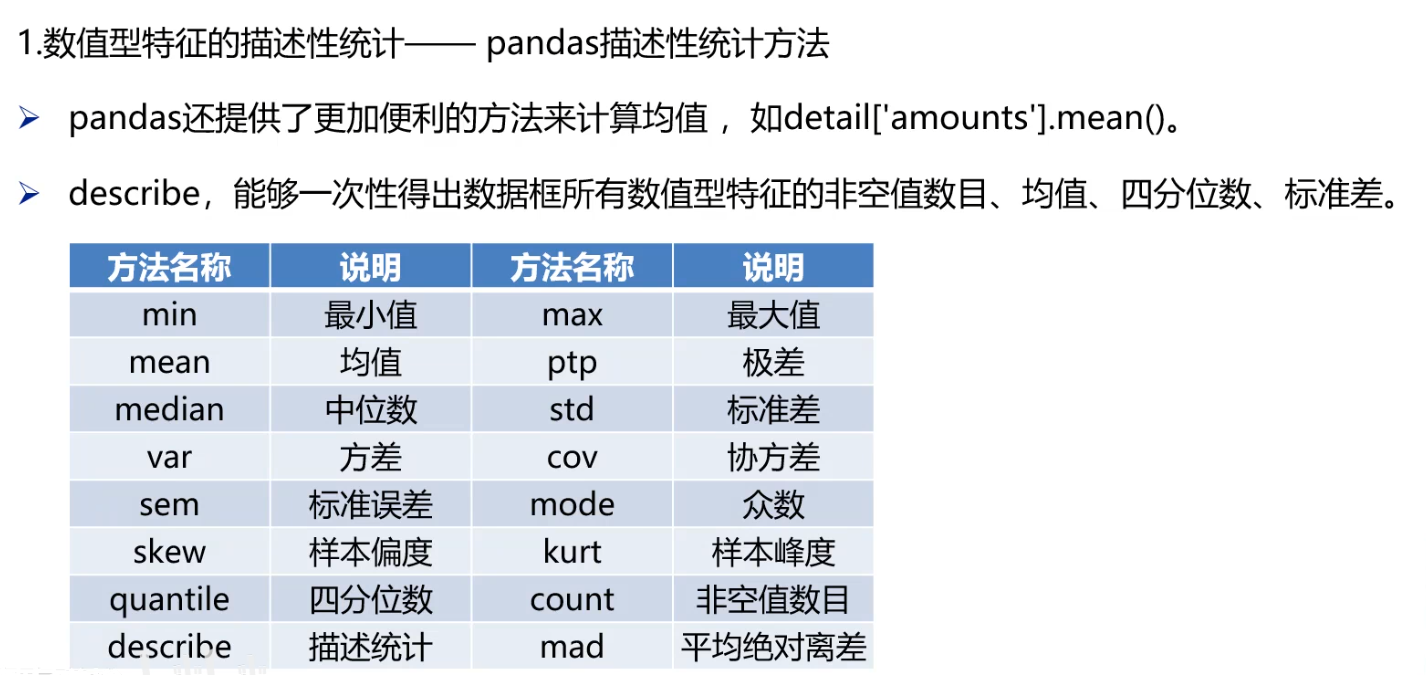

In [73]:
#简单的描述性分析
s = {'color':[1,2,3,4],
     'size':[4,5,6,7],
     'length':[7,8,90,5]}
dfs = pd.DataFrame(s,index = ['a','s','d','f'])

print(dfs)
print(dfs.mean(axis = 0))#pd.mean(dfs)是错误的
#`mean` 函数是 `pandas.core.frame.DataFrame` 类的一个方法，而不是一个全局函数。
#numpy库中有`mean`的全局函数。`numpy.mean()` 是一个全局函数。同时array下面也有一个方法mean()
type(dfs)

dfs.std(axis=0)

dfs.describe()#无axis参数，默认axis=0
dfs.T.describe()#转置可求列方向的统计量

dfs['color'].value_counts()

   color  size  length
a      1     4       7
s      2     5       8
d      3     6      90
f      4     7       5
color      2.5
size       5.5
length    27.5
dtype: float64


color
1    1
2    1
3    1
4    1
Name: count, dtype: int64